In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.utils.np_utils import to_categorical


In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.utils import shuffle #For shuffling the Images data
import cv2

In [4]:
import pandas as pd
import csv
data = pd.read_csv("A_Z Handwritten Data.csv").astype('float32')
print(data.head(10))

     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1 

In [5]:
#Preparation for the Machine Learning Model we have to get the X and Y axis.
#In X axis we are droping the first column
#The ‘0’ contains the labels, & so we drop the ‘0’ column from the data dataframe read
X = data.drop('0',axis = 1)
y = data['0'] #and put the 0 column in the label y

In [6]:
#IN this step Machine learning Model preparation for spliting test and Train data. We
#Test size would be your choise here I put it 0.2 % data
from sklearn.model_selection import train_test_split #Machine lEARNING Model preparation

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
#The below step  is to reshape the Image and Label data according to our requirement
#shape size would be [28,28]

train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [7]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
print(count)
for i in y_int:
   count[i] +=1
alphabets = []
for i in word_dict.values():
    alphabets.append(i)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


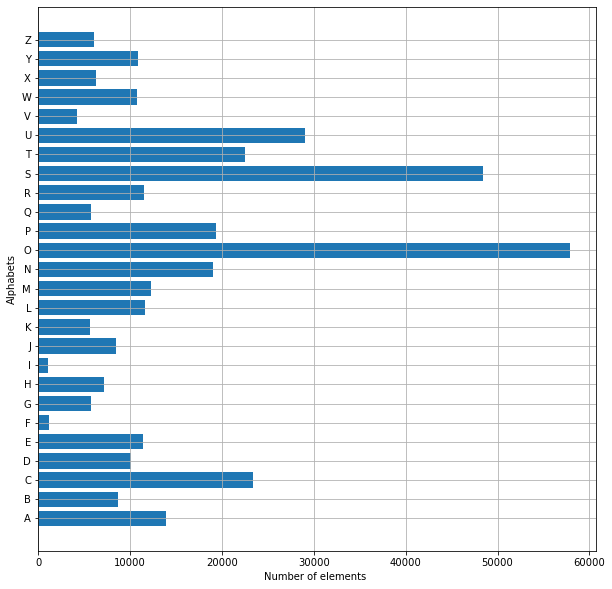

In [8]:
alphabets[1]

#We are ploting the bar graph of size 10 , 10
#In which we can clearly see that Alphabets "o" frequency is greater than 50,000 
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

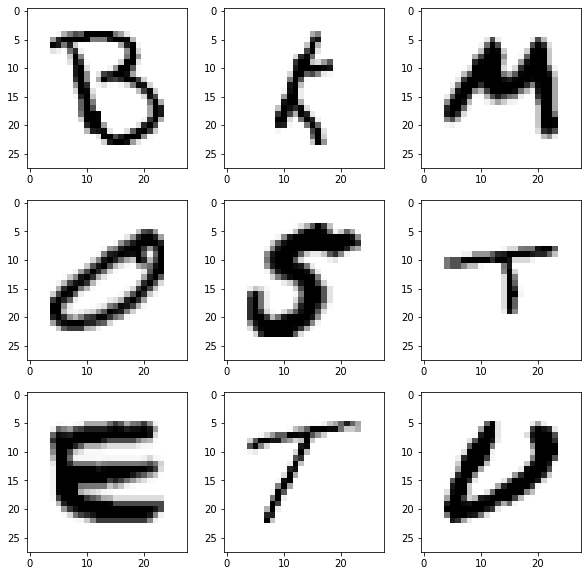

In [9]:
shuff = shuffle(train_x[:10])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [10]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)

print("New shape of train data: ", train_X.shape)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [11]:
train_yOHE =to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)
test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [12]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import backend as k
import tensorflow

In [13]:
model = tf.keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

In [14]:
from tensorflow import keras
from tensorflow.keras import layers
opt = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_yOHE, epochs=1,  validation_data = (test_X,test_yOHE))

Train on 297960 samples, validate on 74490 samples
Epoch 1/1
297960/297960 [==============================] - 104s 349us/step - loss: 0.1608 - acc: 0.9569 - val_loss: 0.0823 - val_acc: 0.9776


In [15]:
model.summary()
model.save(r'model_hand.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
__________

In [16]:
print("The validation accuracy is :", history.history['val_acc'])
print("The training accuracy is :", history.history['acc'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9776077325815545]
The training accuracy is : [0.9569237481541146]
The validation loss is : [0.082285625342654]
The training loss is : [0.16078823966805642]


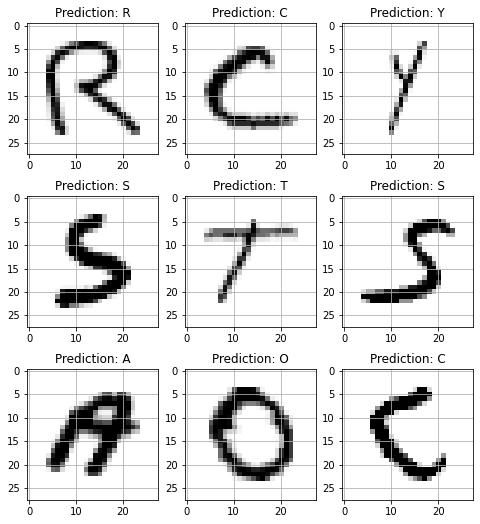

In [17]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
# To showing the 9 images we will loop though the data from test model and will predict the 
# images on the basis of CNN model of keras/tensorflow. 
for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [18]:
import cv2
img = cv2.imread(r'test1.jpg')
img_copy = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

In [19]:
img_pred = word_dict[np.argmax(model.predict(img_final))]
cv2.putText(img, "Arslan's Prediction: ", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
cv2.imshow('Handwritten Character Recognition _ _ _ ', img)

In [ ]:
while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()